In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import seaborn as sns

In [105]:
df = pd.read_csv('/Users/aimaldastagirzada/Downloads/archive (6)/Car details v3.csv')

In [106]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [108]:
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [109]:
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0


In [110]:
df.drop(columns=['name','torque'],inplace=True)

In [111]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


In [112]:
import pandas as pd
import re

# Assuming you have loaded your dataset into a DataFrame named 'df'

# Columns to remove text from
columns_to_clean = ['mileage', 'engine', 'max_power']

# Function to remove text and extract numerical part from each cell using regex
def extract_numerical(cell):
    if isinstance(cell, str):
        numerical_part = re.findall(r'\d+\.\d+|\d+', cell)
        return float(numerical_part[0]) if numerical_part else None
    return None

# Apply the function to the specified columns using str.replace
for column in columns_to_clean:
    df[column] = df[column].str.replace(r'\D+', '').apply(extract_numerical)

print(df)

      year  selling_price  km_driven    fuel seller_type transmission   
0     2014         450000     145500  Diesel  Individual       Manual  \
1     2014         370000     120000  Diesel  Individual       Manual   
2     2006         158000     140000  Petrol  Individual       Manual   
3     2010         225000     127000  Diesel  Individual       Manual   
4     2007         130000     120000  Petrol  Individual       Manual   
...    ...            ...        ...     ...         ...          ...   
8123  2013         320000     110000  Petrol  Individual       Manual   
8124  2007         135000     119000  Diesel  Individual       Manual   
8125  2009         382000     120000  Diesel  Individual       Manual   
8126  2013         290000      25000  Diesel  Individual       Manual   
8127  2013         290000      25000  Diesel  Individual       Manual   

                     owner  mileage  engine  max_power  seats  
0              First Owner    23.40  1248.0      74.00    5

In [113]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


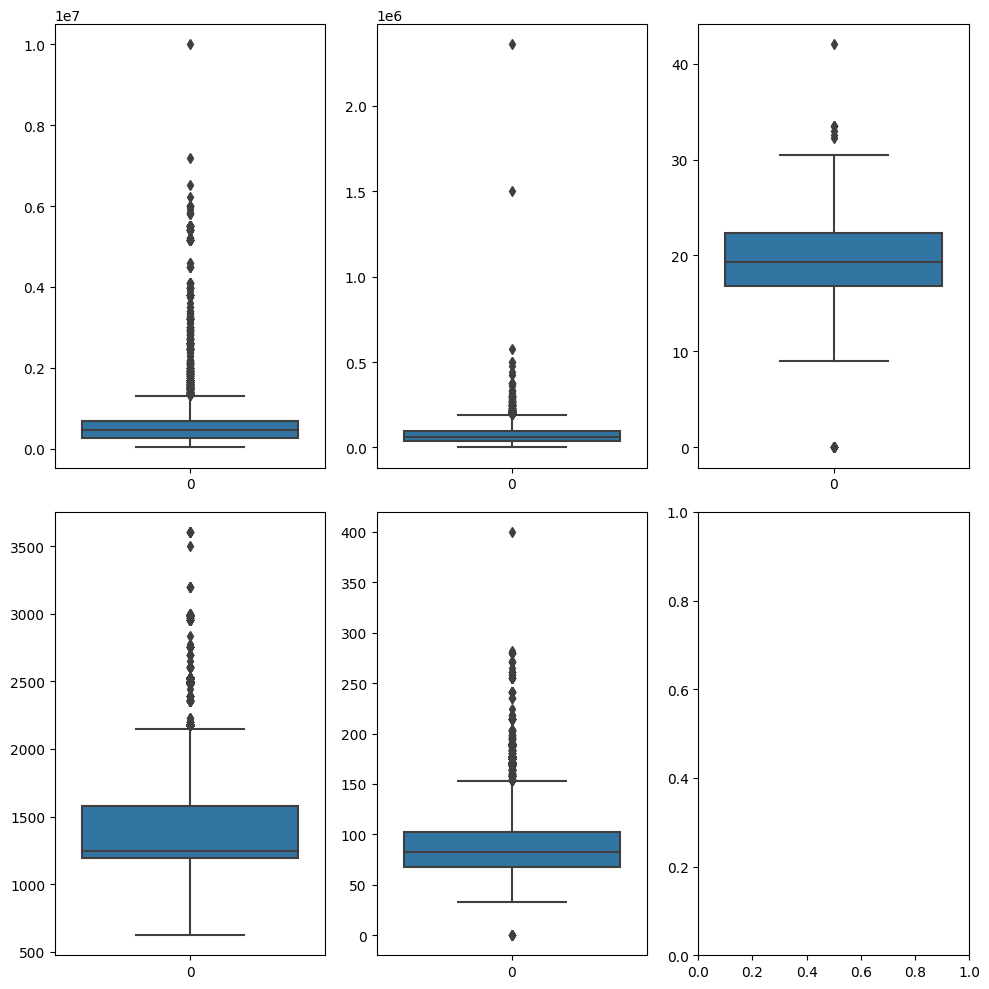

In [114]:
fig, axs = plt.subplots(2,3, figsize = (10,10))
plt1 = sns.boxplot(df['selling_price'], ax = axs[0,0])
plt2 = sns.boxplot(df['km_driven'], ax = axs[0,1])
plt3 = sns.boxplot(df['mileage'], ax = axs[0,2])
plt4 = sns.boxplot(df['engine'], ax = axs[1,0])
plt5 = sns.boxplot(df['max_power'], ax = axs[1,1])

plt.tight_layout()

In [115]:
df = df[df['selling_price'] < 3500000]

In [116]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [117]:
df = df[df['km_driven'] < 1000000]

In [118]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


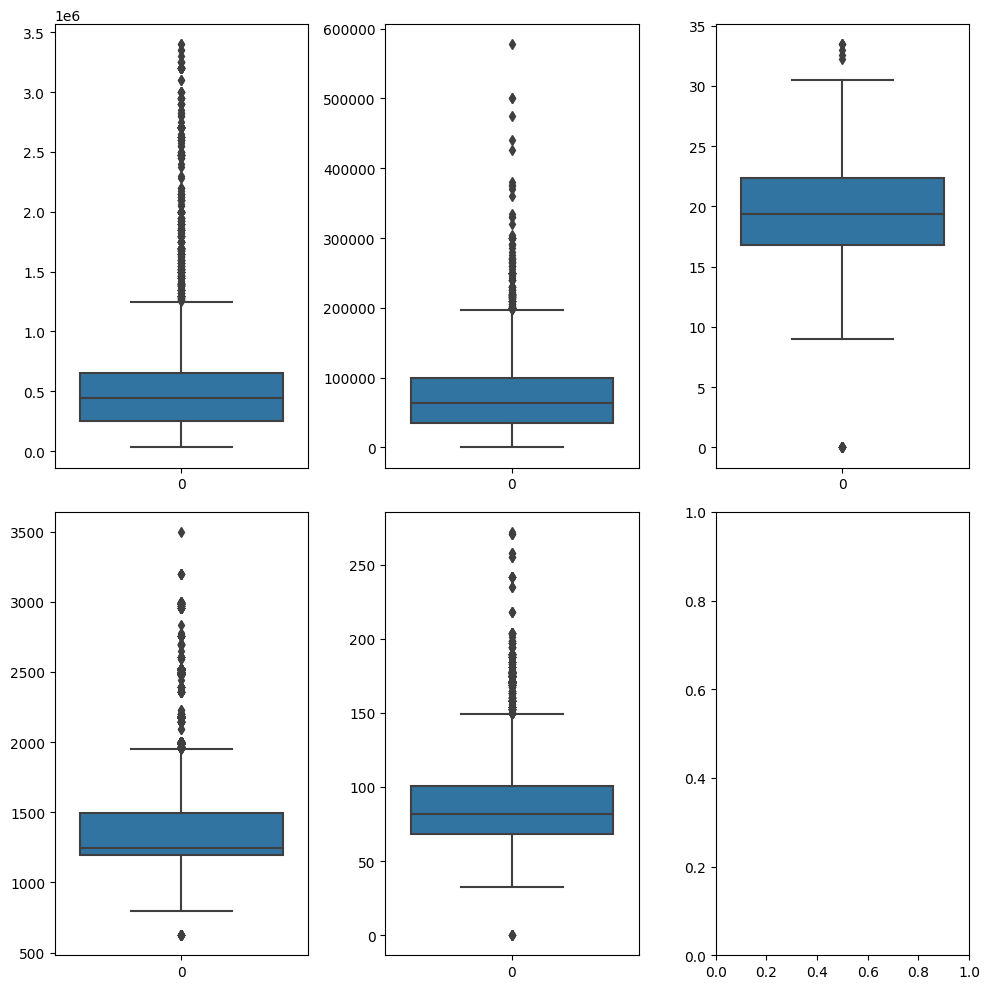

In [119]:
fig, axs = plt.subplots(2,3, figsize = (10,10))
plt1 = sns.boxplot(df['selling_price'], ax = axs[0,0])
plt2 = sns.boxplot(df['km_driven'], ax = axs[0,1])
plt3 = sns.boxplot(df['mileage'], ax = axs[0,2])
plt4 = sns.boxplot(df['engine'], ax = axs[1,0])
plt5 = sns.boxplot(df['max_power'], ax = axs[1,1])

plt.tight_layout()

In [120]:
df=df[df['km_driven'] <330000]

In [121]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [122]:
df=df[df['engine'] <2800]

In [123]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [124]:
df=df[df['max_power'] <200]

In [125]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [126]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [127]:
def change_transmission(x):
    if x=='Automatic':
        return 1
    else:
        return 0
    
df['transmission'] = df['transmission'].apply(change_transmission)

/var/folders/yk/m3w26_h527n36v88wgw18khc0000gn/T/ipykernel_70946/2534489260.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transmission'] = df['transmission'].apply(change_transmission)


In [128]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,0,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,0,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,0,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,0,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,0,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,0,First Owner,18.50,1197.0,82.85,5.0
8124,2007,135000,119000,Diesel,Individual,0,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,2009,382000,120000,Diesel,Individual,0,First Owner,19.30,1248.0,73.90,5.0
8126,2013,290000,25000,Diesel,Individual,0,First Owner,23.57,1396.0,70.00,5.0


In [129]:
df['transmission'].value_counts()

transmission
0    6807
1     806
Name: count, dtype: int64

In [130]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,0,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,0,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,0,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,0,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,0,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,0,First Owner,18.50,1197.0,82.85,5.0
8124,2007,135000,119000,Diesel,Individual,0,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,2009,382000,120000,Diesel,Individual,0,First Owner,19.30,1248.0,73.90,5.0
8126,2013,290000,25000,Diesel,Individual,0,First Owner,23.57,1396.0,70.00,5.0


In [131]:
df['fuel'].value_counts()

fuel
Diesel    4063
Petrol    3463
CNG         52
LPG         35
Name: count, dtype: int64

In [132]:
def change_fuel(x):
    if x=='Diesel':
        return 0
    elif x=='Petrol':
        return 1
    elif x=='LPG':
        return 2
    elif x=='CNG':
        return 3
    
df['fuel'] = df['fuel'].apply(change_fuel)

/var/folders/yk/m3w26_h527n36v88wgw18khc0000gn/T/ipykernel_70946/1279715074.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel'] = df['fuel'].apply(change_fuel)


In [133]:
df['fuel'].value_counts()

fuel
0    4063
1    3463
3      52
2      35
Name: count, dtype: int64

In [136]:
results = ols("selling_price ~ transmission + km_driven + mileage+ max_power + fuel", data= df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     2682.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:50:57   Log-Likelihood:            -1.0621e+05
No. Observations:                7613   AIC:                         2.124e+05
Df Residuals:                    7607   BIC:                         2.125e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.021e+05   2.95e+04    -10.226   

In [138]:
"y_hat =  -3.021e+05  + 3.39e+05 transmission  -2.4998 km_driven + 1.064e+04 mileage+ 9482.7634 max_power -1.285e+05 fuel"

'y_hat =  -3.021e+05  + 3.39e+05 transmission  -2.4998 km_driven + 1.064e+04 mileage+ 9482.7634 max_power -1.285e+05 fuel'

In [140]:
df.head(1)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,0,Individual,0,First Owner,23.4,1248.0,74.0,5.0


In [141]:
-3.021e+05 +3.39e+05*(0) -2.4998*(145500) + 1.064e+04*(23.4)+ 9482.7634*(74.0) -1.285e+05*(0)

284879.5915999999

In [142]:
pred_vals = results.predict(df[['transmission','km_driven','mileage', 'max_power', 'fuel' ]])
pred_vals

0       284819.584288
1       604456.058489
2       147342.905102
3       478534.991200
4       277043.861651
            ...      
8123    276837.033747
8124    622240.686912
8125    304005.002871
8126    549919.998651
8127    549919.998651
Length: 7613, dtype: float64

In [143]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['selling_price']], axis=1)

In [144]:
res

,y_hat,selling_price
0,284819.584288,450000
1,604456.058489,370000
2,147342.905102,158000
3,478534.991200,225000
4,277043.861651,130000
...,...,...
8123,276837.033747,320000
8124,622240.686912,135000
8125,304005.002871,382000
8126,549919.998651,290000


In [145]:
res['error'] = res['y_hat'] - res['selling_price']

In [146]:
res.head(1)

,y_hat,selling_price,error
0,284819.584288,450000,-165180.415712


In [147]:
res['sq_error'] = res['error']**2

In [148]:
np.sqrt(res['sq_error'].mean())

277082.08125768736

(array([   7.,   50.,   21.,  130.,  566., 3746., 2580.,  436.,   69.,
           8.]),
 array([-1820866.46404053, -1509071.46070571, -1197276.45737089,
         -885481.45403608,  -573686.45070126,  -261891.44736644,
           49903.55596838,   361698.55930319,   673493.56263801,
          985288.56597283,  1297083.56930764]),
 <BarContainer object of 10 artists>)

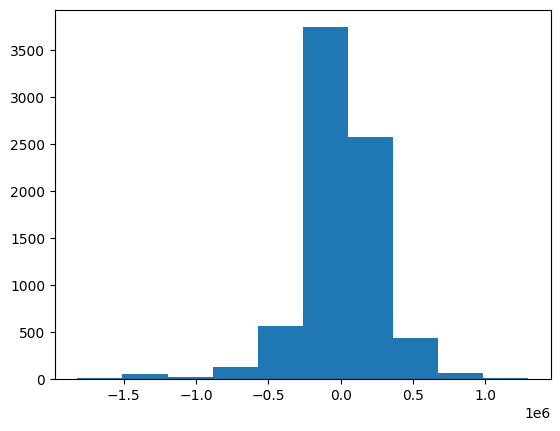

In [149]:
plt.hist(res['error'])

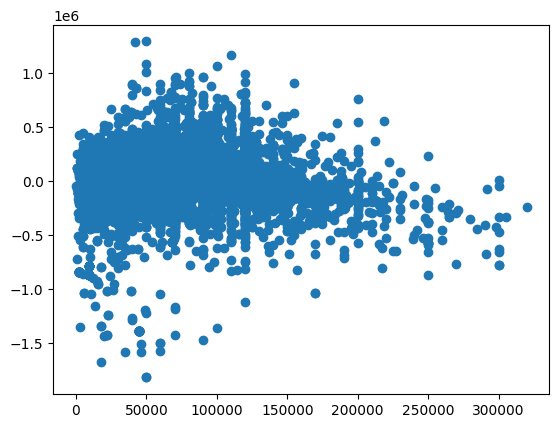

In [151]:
plt.scatter(df['km_driven'], res  ['error'])

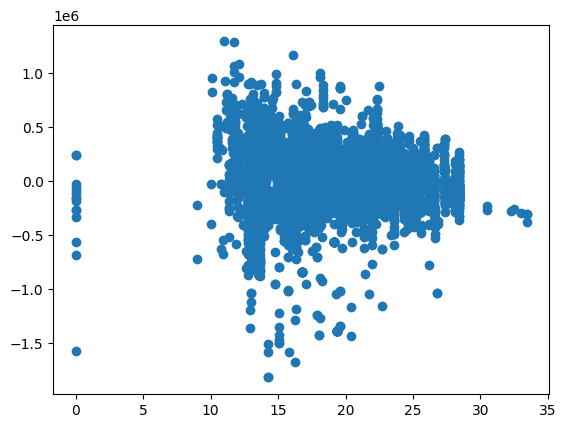

In [152]:
plt.scatter(df['mileage'], res  ['error'])


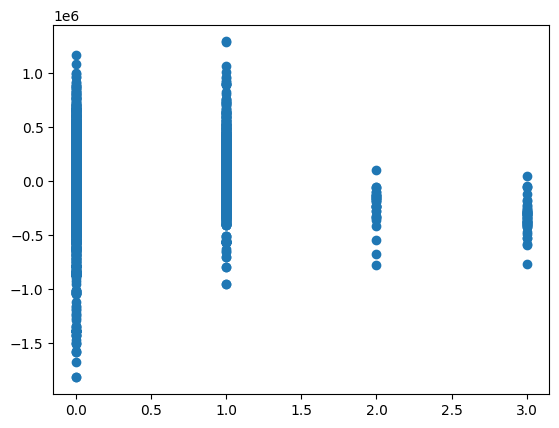

In [154]:
plt.scatter(df['fuel'], res  ['error'])


((array([-3.74265329, -3.51365534, -3.38775109, ...,  3.38775109,
          3.51365534,  3.74265329]),
  array([-1820866.46404053, -1820866.46404053, -1681763.13132148, ...,
          1169276.48093654,  1292091.01141082,  1297083.56930764])),
 (264513.8906140359, -8.680716320050859e-06, 0.9542042393525525))

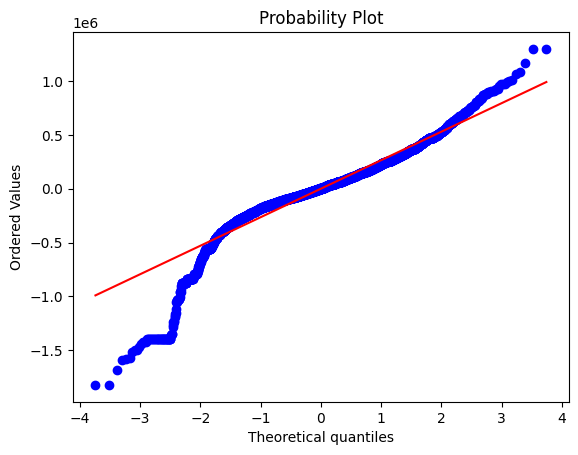

In [155]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [156]:
infl = results.get_influence()
print(infl.summary_frame())

      dfb_Intercept  dfb_transmission  dfb_km_driven  dfb_mileage   
0         -0.005456          0.002129       0.011703     0.007675  \
1          0.008536          0.003089      -0.010242    -0.007953   
2         -0.000263         -0.000041       0.000836     0.000065   
3          0.010466          0.000531      -0.013764    -0.012207   
4          0.001723          0.002143      -0.008020     0.001695   
...             ...               ...            ...          ...   
8123      -0.001077         -0.000538       0.002227     0.000440   
8124      -0.000571          0.008653      -0.013907     0.006675   
8125       0.001783          0.000714       0.002313    -0.000851   
8126      -0.007662          0.001057       0.013983    -0.002094   
8127      -0.007662          0.001057       0.013983    -0.002094   

      dfb_max_power  dfb_fuel       cooks_d  standard_resid  hat_diag   
0         -0.001375 -0.001640  4.498151e-05        0.596134  0.000759  \
1         -0.007253  0.00

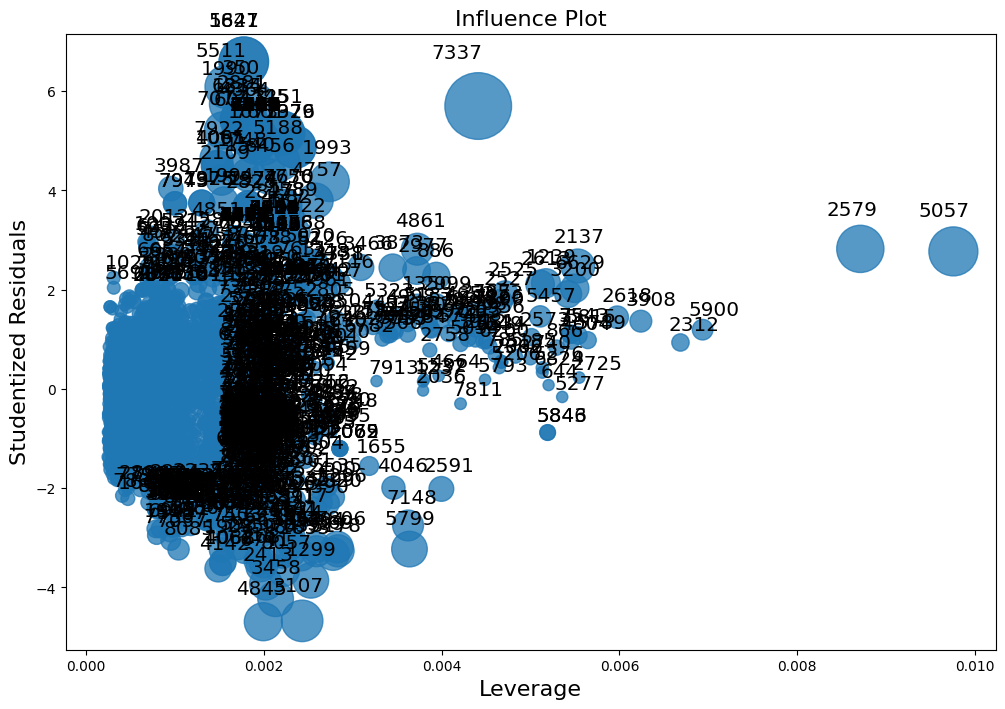

In [157]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [159]:
df.drop(7337, inplace= True)

/var/folders/yk/m3w26_h527n36v88wgw18khc0000gn/T/ipykernel_70946/792708474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(7337, inplace= True)


In [160]:
results = ols("selling_price ~ transmission +km_driven +mileage + max_power + fuel ", data= df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     2679.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:01:06   Log-Likelihood:            -1.0618e+05
No. Observations:                7612   AIC:                         2.124e+05
Df Residuals:                    7606   BIC:                         2.124e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.074e+05   2.95e+04    -10.421   

In [162]:
infl = results.get_influence()
print(infl.summary_frame())

      dfb_Intercept  dfb_transmission  dfb_km_driven  dfb_mileage   
0         -0.005440          0.002111       0.011651     0.007650  \
1          0.008565          0.003102      -0.010277    -0.007977   
2         -0.000258         -0.000040       0.000821     0.000064   
3          0.010533          0.000543      -0.013844    -0.012283   
4          0.001718          0.002140      -0.008015     0.001698   
...             ...               ...            ...          ...   
8123      -0.001075         -0.000537       0.002221     0.000439   
8124      -0.000601          0.008638      -0.013898     0.006714   
8125       0.001787          0.000715       0.002319    -0.000853   
8126      -0.007679          0.001066       0.014032    -0.002114   
8127      -0.007679          0.001066       0.014032    -0.002114   

      dfb_max_power  dfb_fuel       cooks_d  standard_resid  hat_diag   
0         -0.001371 -0.001626  4.458250e-05        0.593283  0.000759  \
1         -0.007275  0.00

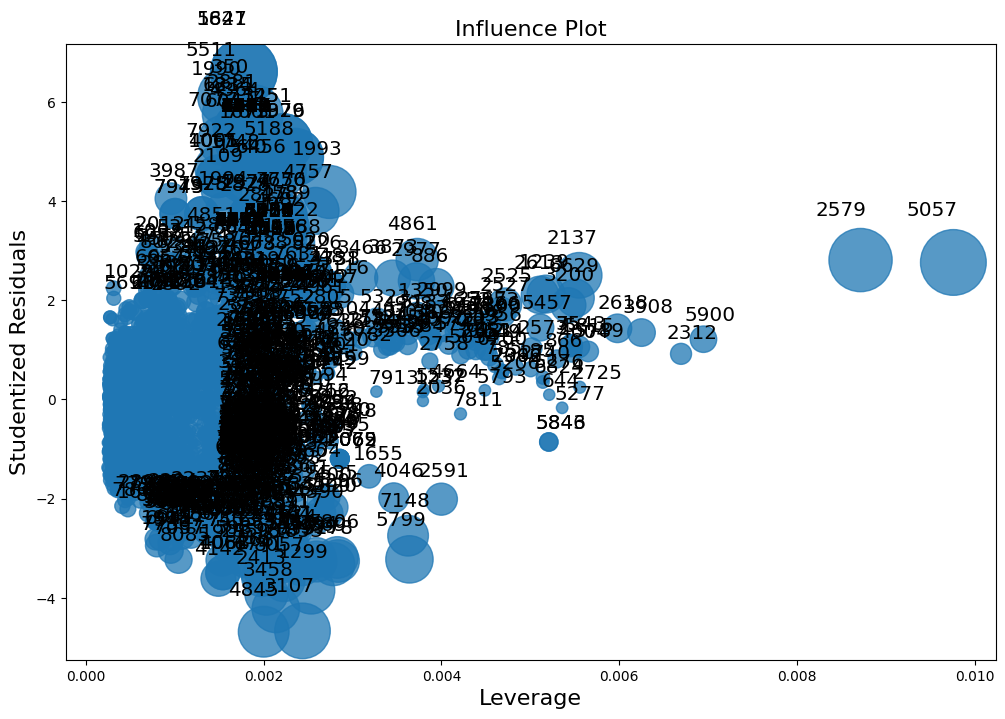

In [163]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [164]:
df['fuel'].unique()

array([0, 1, 2, 3])

In [173]:
dummies_seller = pd.get_dummies(df.seller_type, dtype=int)
df_new= pd.concat([df,dummies_seller], axis=1)

In [175]:
results = ols("selling_price ~ transmission +km_driven +mileage + max_power + fuel+ seller_type ", data= df_new).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     1984.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:23:37   Log-Likelihood:            -1.0609e+05
No. Observations:                7612   AIC:                         2.122e+05
Df Residuals:                    7604   BIC:                         2.123e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [179]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [ ]:
df['']

In [176]:
dummies_owner = pd.get_dummies(df.owner, dtype=int)
df_new= pd.concat([df,dummies_owner], axis=1)


In [177]:
results = ols("selling_price ~ transmission +km_driven +mileage + max_power + fuel+ seller_type+ owner ", data= df_new).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     1331.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:23:41   Log-Likelihood:            -1.0596e+05
No. Observations:                7612   AIC:                         2.119e+05
Df Residuals:                    7600   BIC:                         2.120e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [178]:
df_new.describe(include='all')

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
count,7612.000000,7.612000e+03,7612.000000,7612.000000,7612,7612.000000,7612,7612.000000,7612.000000,7612.000000,7612.000000,7612.000000,7612.000000,7612.000000,7612.000000,7612.000000
unique,NaN,NaN,NaN,NaN,3,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Individual,NaN,First Owner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,6418,NaN,4981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2013.897793,5.400577e+05,68965.071992,0.484630,NaN,0.105754,NaN,19.560860,1420.276406,87.856197,5.408960,0.654362,0.020625,0.259065,0.000263,0.065686
std,3.845978,4.595154e+05,45371.836433,0.547711,NaN,0.307543,NaN,3.966051,462.736110,29.442048,0.955033,0.475607,0.142136,0.438150,0.016208,0.247748
min,1994.000000,2.999900e+04,1.000000,0.000000,NaN,0.000000,NaN,0.000000,624.000000,32.800000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,2.600000e+05,35000.000000,0.000000,NaN,0.000000,NaN,16.950000,1197.000000,68.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,4.500000e+05,60000.000000,0.000000,NaN,0.000000,NaN,19.500000,1248.000000,81.860000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,6.500000e+05,96457.250000,1.000000,NaN,0.000000,NaN,22.320000,1498.000000,100.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
